In [1]:
import numpy as np
import pandas as pd

In [2]:
tot_dataset = pd.read_csv('./data/total.csv')
tot_dataset.head()

,id,source,sentence_1,sentence_2,label,binary-label
0,boostcamp-sts-v1-train-000,nsmc-sampled,스릴도있고 반전도 있고 여느 한국영화 쓰레기들하고는 차원이 다르네요~,"반전도 있고,사랑도 있고재미도있네요.",2.2,0.0
1,boostcamp-sts-v1-train-001,slack-rtt,앗 제가 접근권한이 없다고 뜹니다;;,"오, 액세스 권한이 없다고 합니다.",4.2,1.0
2,boostcamp-sts-v1-train-002,petition-sampled,주택청약조건 변경해주세요.,주택청약 무주택기준 변경해주세요.,2.4,0.0
3,boostcamp-sts-v1-train-003,slack-sampled,입사후 처음 대면으로 만나 반가웠습니다.,화상으로만 보다가 리얼로 만나니 정말 반가웠습니다.,3.0,1.0
4,boostcamp-sts-v1-train-004,slack-sampled,뿌듯뿌듯 하네요!!,꼬옥 실제로 한번 뵈어요 뿌뿌뿌~!~!,0.0,0.0


In [3]:
!pip install -U matplotlib


[notice] A new release of pip is available: 23.1 -> 23.1.1
[notice] To update, run: pip install --upgrade pip


In [4]:
import matplotlib.pyplot as plt

## 문장 길이 확인

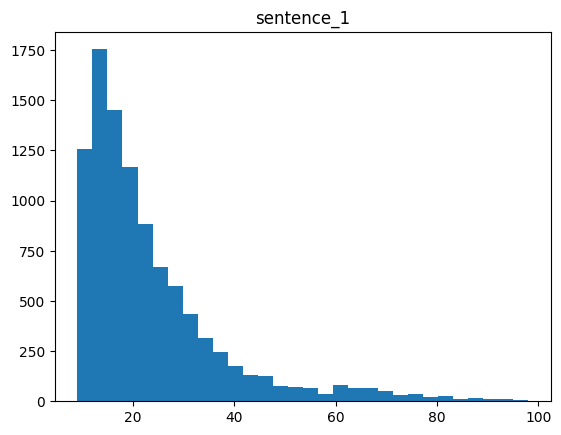

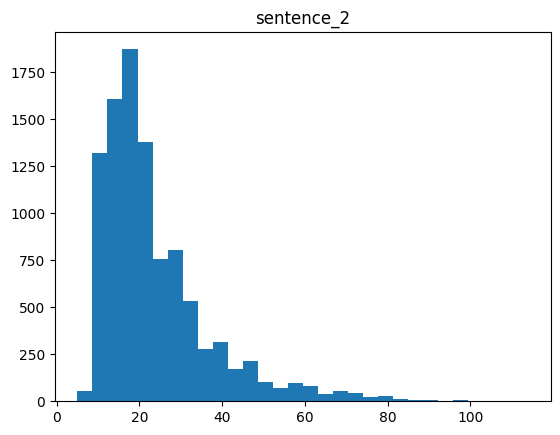

<Figure size 640x480 with 0 Axes>

In [5]:
length_sent1 = [len(sent) for sent in tot_dataset['sentence_1']]
length_sent2 = [len(sent) for sent in tot_dataset['sentence_2']]

# plt.hist(length_sent1, label='sentence_1')
# plt.hist(length_sent2, label='sentence_2')# bins = 30
# plt.legend()
# plt.show()


plt.hist(length_sent1, histtype='bar', bins = 30)
plt.title('sentence_1')
plt.figure()

plt.hist(length_sent2, histtype='bar', bins = 30)
plt.title('sentence_2')
plt.figure()
plt.show()

## label 비율 체크

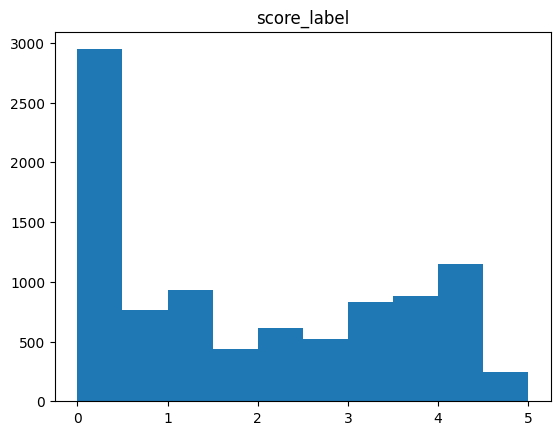

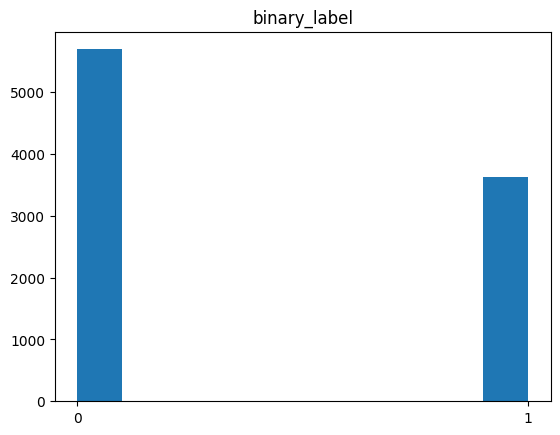

<Figure size 640x480 with 0 Axes>

In [6]:
train_df = pd.read_csv('./data/train.csv')
plt.hist(train_df['label'], label='score_label')
plt.title('score_label')
plt.figure()

plt.hist(train_df['binary-label'], label='binary_label')
plt.xticks([0,1])
plt.title('binary_label')
plt.figure()

plt.show()


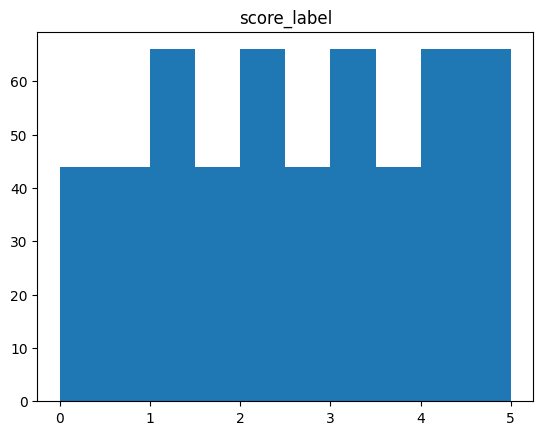

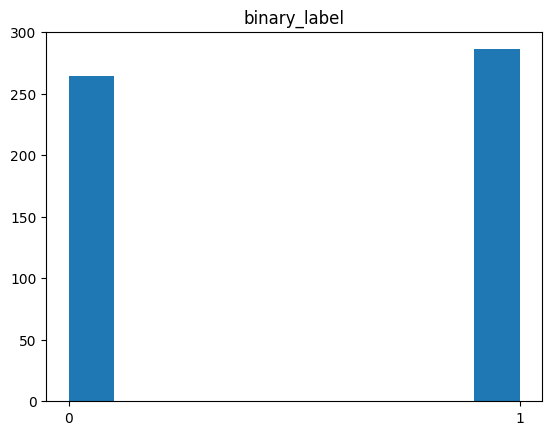

<Figure size 640x480 with 0 Axes>

In [7]:
val_df = pd.read_csv('./data/dev.csv')
plt.hist(val_df['label'], label='score_label')
plt.title('score_label')
plt.figure()

plt.hist(val_df['binary-label'], label='binary_label')
plt.xticks([0,1])
plt.title('binary_label')
plt.figure()

plt.show()

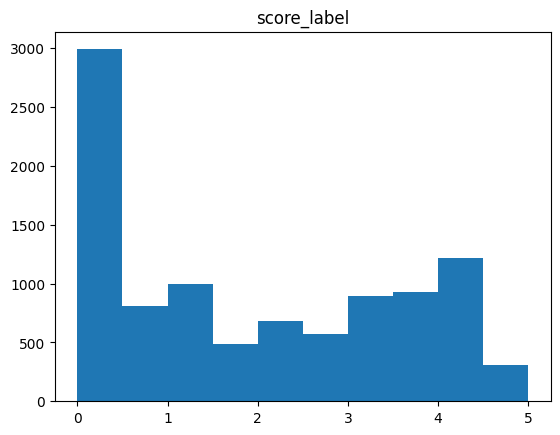

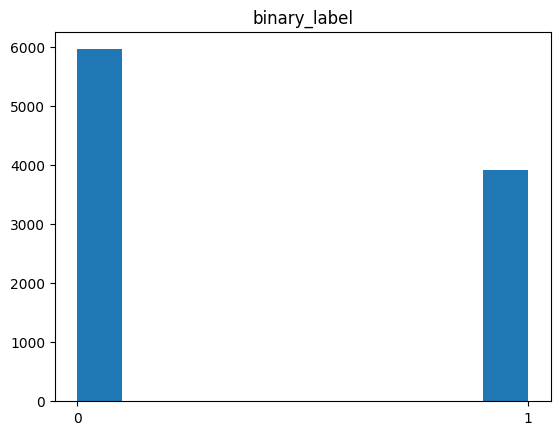

<Figure size 640x480 with 0 Axes>

In [8]:
val_df = pd.read_csv('./data/total.csv')
plt.hist(val_df['label'], label='score_label')
plt.title('score_label')
plt.figure()

plt.hist(val_df['binary-label'], label='binary_label')
plt.xticks([0,1])
plt.title('binary_label')
plt.figure()

plt.show()

## Data Augmentation - A,B 문장 순서 바꾸기

In [16]:
train_df = pd.read_csv('./data/train.csv')
train_df.head()

,id,source,sentence_1,sentence_2,label,binary-label
0,boostcamp-sts-v1-train-000,nsmc-sampled,스릴도있고 반전도 있고 여느 한국영화 쓰레기들하고는 차원이 다르네요~,"반전도 있고,사랑도 있고재미도있네요.",2.2,0.0
1,boostcamp-sts-v1-train-001,slack-rtt,앗 제가 접근권한이 없다고 뜹니다;;,"오, 액세스 권한이 없다고 합니다.",4.2,1.0
2,boostcamp-sts-v1-train-002,petition-sampled,주택청약조건 변경해주세요.,주택청약 무주택기준 변경해주세요.,2.4,0.0
3,boostcamp-sts-v1-train-003,slack-sampled,입사후 처음 대면으로 만나 반가웠습니다.,화상으로만 보다가 리얼로 만나니 정말 반가웠습니다.,3.0,1.0
4,boostcamp-sts-v1-train-004,slack-sampled,뿌듯뿌듯 하네요!!,꼬옥 실제로 한번 뵈어요 뿌뿌뿌~!~!,0.0,0.0


In [17]:
swap_df = train_df.copy()
swap_df = swap_df[['id', 'source', 'sentence_2', 'sentence_1', 'label', 'binary-label']]
# swap_df.head()
swap_df.columns = train_df.columns

In [18]:
da_df = pd.concat([train_df,swap_df])
da_df.reset_index(drop=True, inplace=True)

da_df.to_csv('./data/augs_train.csv',index=False)